# Projeto de Disciplina de Processamento de Linguagem Natural com Python

Bem-vindo ao projeto de disciplina de **Processamento de Linguagem Natural com Python**. Ao longo das últimas aulas vimos uma série de aplicações que nos deram a amplitude de possibilidades em trabalhar com textos. Para tal, usamos diversas bibliotecas, onde as que mais se destacaram foram NLTK, SPACY e GENSIM.

Esse notebook servirá de guia para a execução de uma análise de tópicos completa, usando o algoritmo de LDA e recursos para interpretação dos resultados. Utilizaremos notícias da seção "Mercado" extraídas da Folha de S. Paulo no ano de 2016.  Complete a análise com os códigos que achar pertinente e responda as questões presentes no Moodle. Boa sorte!

## O Notebook

Nesse notebook, você será guiado pela análise de **Extração de Tópicos**. As seguintes tarefas serão realizadas


1.   Download dos dados provenientes do kaggle
2.   Seleção dos dados relevantes para a nossa análise
3.   Instalação das principais ferramentas e importação de módulos
4.   Pré-processamento usando NLTK
5.   Pré-processamento usando Spacy
6.   Análise de tópicos usando LDA
7.   Análise de NER usando Spacy
8.   Visualização dos tópicos usando tokens e entidades.



## Instruções para baixar os dados

Para baixar os dados será necessário o uso do gerenciador de downloads da Kaggle. A Kaggle, uma subsidiária do grupo Alphabet (Google), é uma comunidade on-line de cientistas de dados e profissionais de aprendizado de máquina.

Para utilizar o gerenciador, será necessário criar uma conta no site Kaggle.com.
Com a conta criada, obtenha um token de acesso, no formato kaggle.json

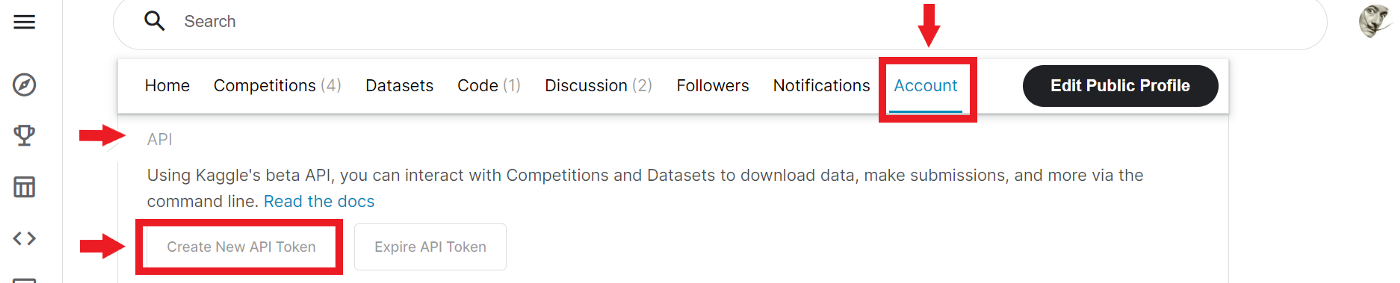

Em posse do token (baixe para seu computador), execute a células da próxima seção para acessar os dados de interesse e baixá-los.

# Baixe os dados

Instale o gerenciador kaggle no ambiente do Colab e faça o upload do arquivo kaggle.json

In [1]:
!pip install -q kaggle
!rm -rf kaggle.json
from google.colab import files

files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rosanariblim","key":"9b1abd5bc2f5881fcf8d79adfdddcb76"}'}

Crie a pasta .kaggle

In [2]:
!rm -rf ~/.kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

Baixe o dataset

In [3]:
!kaggle datasets download --force -d marlesson/news-of-the-site-folhauol

Dataset URL: https://www.kaggle.com/datasets/marlesson/news-of-the-site-folhauol
License(s): CC0-1.0
 78% 146M/187M [00:00<00:00, 454MB/s] 
100% 187M/187M [00:00<00:00, 483MB/s]


## Criar o DataFrame com os dados lidos diretamente da plataforma Kaggle

In [4]:
import pandas as pd
from tqdm.auto import tqdm
tqdm.pandas()


df = pd.read_csv("news-of-the-site-folhauol.zip")

In [5]:
df

,title,text,date,category,subcategory,link
0,"Lula diz que está 'lascado', mas que ainda tem...",Com a possibilidade de uma condenação impedir ...,2017-09-10,poder,NaN,http://www1.folha.uol.com.br/poder/2017/10/192...
1,"'Decidi ser escrava das mulheres que sofrem', ...","Para Oumou Sangaré, cantora e ativista malines...",2017-09-10,ilustrada,NaN,http://www1.folha.uol.com.br/ilustrada/2017/10...
2,Três reportagens da Folha ganham Prêmio Petrob...,Três reportagens da Folha foram vencedoras do ...,2017-09-10,poder,NaN,http://www1.folha.uol.com.br/poder/2017/10/192...
3,Filme 'Star Wars: Os Últimos Jedi' ganha trail...,A Disney divulgou na noite desta segunda-feira...,2017-09-10,ilustrada,NaN,http://www1.folha.uol.com.br/ilustrada/2017/10...
4,CBSS inicia acordos com fintechs e quer 30% do...,"O CBSS, banco da holding Elopar dos sócios Bra...",2017-09-10,mercado,NaN,http://www1.folha.uol.com.br/mercado/2017/10/1...
...,...,...,...,...,...,...
167048,"Em cenário de crise, tucano Beto Richa assume ...",O tucano Beto Richa tinha tudo para começar se...,2015-01-01,poder,NaN,http://www1.folha.uol.com.br/poder/2015/01/156...
167049,Filho supera senador Renan Calheiros e assume ...,O economista Renan Filho (PMDB) assume nesta q...,2015-01-01,poder,NaN,http://www1.folha.uol.com.br/poder/2015/01/156...
167050,"Hoje na TV: Tottenham x Chelsea, Campeonato In...",Destaques da programação desta quinta-feira (1...,2015-01-01,esporte,NaN,http://www1.folha.uol.com.br/esporte/2015/01/1...
167051,Kim Jong-un diz estar aberto a se reunir com p...,"O líder norte-coreano, Kim Jong-un, disse nest...",2015-01-01,mundo,NaN,http://www1.folha.uol.com.br/mundo/2015/01/156...


# Atualizar o SPACY e  instalar os modelos pt_core_news_lg

In [6]:
!pip install --quiet spacy
!python -m spacy download pt_core_news_lg

import spacy
nlp = spacy.load('pt_core_news_lg')

from spacy.lang.pt.stop_words import STOP_WORDS

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.2/568.2 MB 2.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## Instalar os datasets `stopwords`, `punkt` e `rslp` do nltk

In [7]:
import nltk


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('rslp')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

## Carregar os módulos usados ao longo desse notebook

In [8]:
!pip install pyldavis &> /dev/null

import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import numpy as np

from wordcloud import WordCloud

import seaborn as sns
import matplotlib.pyplot as plt
from itertools import chain

from typing import List, Set, Any


SEED = 123

# Filtrando os dados para utilizar apenas as notícias do ano de 2016 e da categoria "Mercado"

Filtre os dados do DataFrame df e crie um DataFrame news_2016 que contenha apenas notícias de **2016** e da categoria **mercado**.

In [9]:
df['date'] = pd.to_datetime(df.date)

news_2016 = df.loc[(df['date'].dt.year == 2016) & (df['category'] == 'mercado')]

news_2016.shape
news_2016

,title,text,date,category,subcategory,link
34207,Fazendeira cria própria rede de banda larga e ...,"""Sou apenas a mulher de um fazendeiro"", diz Ch...",2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...
34238,Alteração na cobrança do ICMS eleva conta de c...,A conta do celular pós-pago ou controle ficará...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...
34245,Ajustes sobre servidores públicos emperram nos...,A maior parte dos projetos de ajuste das conta...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...
34248,Inventor da internet das coisas ataca mitos so...,Desde as primeiras décadas do século 19 se diz...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...
34249,Livro analisa empresas de crescimento exponenc...,O Cifras & Letras seleciona semanalmente lança...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...
...,...,...,...,...,...,...
94280,Previsões para economia dependem de rumos do g...,"Para o economista Rodolfo Margato, do banco Sa...",2016-01-01,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/01/1...
94295,Repelentes e água de coco lideram a lista de s...,"Conveniência, saúde, boa forma e prazer. As te...",2016-01-01,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/01/1...
94301,Renda em queda leva mais pessoas às filas de e...,"Com o rendimento em queda, mais pessoas são fo...",2016-01-01,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/01/1...
94310,"Brasil pode perder até 2,2 milhões de vagas fo...","O Brasil pode perder até 2,2 milhões de vagas ...",2016-01-01,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/01/1...


## NLTK Tokenizer and Stemmer

Crie uma coluna no dataframe `news_2016` contendo os tokens para cada um dos textos. Os tokens devem estar representados pelo radical das palavras (stem).
Para tal, complete o conteúdo da função `tokenize`.

In [10]:
import re

def tokenize(text: str) -> List:
  """
  Function for tokenizing using `nltk.tokenize.word_tokenize`

  Returns:
    - A list of stemmed tokens (`nltk.stem.RSLPStemmer`)
    IMPORTANT: Only tokens with alphabetic
               characters will be returned.
  """
  text = text.lower()
  text = re.sub(r'[^a-záéíóúàèìòùâêîôûãõç\s]', '', text)  # mantém letras com acentos e espaço
  tokens = nltk.tokenize.word_tokenize(text)
  # custom_stop_words = set(nltk.corpus.stopwords.words('portuguese'))
  # cleaned_tokens = [word for word in tokens if word not in custom_stop_words]
  # cleaned_tokens = [token for token in cleaned_tokens if len(token) > 2]
  stemmer = nltk.stem.RSLPStemmer()
  stemmed_tokens = [stemmer.stem(token) for token in tokens]
  return stemmed_tokens

news_2016.loc[:, 'nltk_tokens'] = news_2016.text.progress_map(tokenize)

news_2016.loc[:, 'nltk_tokens']

  0%|          | 0/7943 [00:00<?, ?it/s]

,nltk_tokens
34207,"[sou, apen, a, mulh, de, um, fazend, diz, chri..."
34238,"[a, cont, do, celul, póspag, ou, control, fic,..."
34245,"[a, mai, part, do, projet, de, ajust, da, cont..."
34248,"[desd, as, prim, déc, do, sécul, se, diz, que,..."
34249,"[o, cifr, letr, selec, seman, lanç, na, áre, d..."
...,...
94280,"[par, o, econom, rodolf, margat, do, banc, san..."
94295,"[conveni, saúd, boa, form, e, praz, as, tend, ..."
94301,"[com, o, rend, em, qued, mais, pesso, são, for..."
94310,"[o, brasil, pod, perd, até, milhã, de, vag, co..."


## Criar uma documento SPACY para cada texto do dataset

Crie uma coluna `spacy_doc` que contenha os objetos spacy para cada texto do dataset de interesse. Para tal, carregue os modelos `pt_core_news_lg` e aplique em todos os textos (pode demorar alguns minutos...)

In [11]:

news_2016.loc[:, 'spacy_doc'] = news_2016.text.progress_map(nlp)
news_2016.loc[:, 'spacy_doc']

  0%|          | 0/7943 [00:00<?, ?it/s]

,spacy_doc
34207,"("", Sou, apenas, a, mulher, de, um, fazendeiro..."
34238,"(A, conta, do, celular, pós-pago, ou, controle..."
34245,"(A, maior, parte, dos, projetos, de, ajuste, d..."
34248,"(Desde, as, primeiras, décadas, do, século, 19..."
34249,"(O, Cifras, &, Letras, seleciona, semanalmente..."
...,...
94280,"(Para, o, economista, Rodolfo, Margato, ,, do,..."
94295,"(Conveniência, ,, saúde, ,, boa, forma, e, pra..."
94301,"(Com, o, rendimento, em, queda, ,, mais, pesso..."
94310,"(O, Brasil, pode, perder, até, 2,2, milhões, d..."


## Realize a Lematização usando SPACY

O modelo NLP do spacy oferece a possiblidade de lematizar textos em português (o que não acontece com a biblioteca NLTK). Iremos criar uma lista de tokens
lematizados para cada texto do nosso dataset. Para tal, iremos retirar as
stopwords, usando uma função que junta stopwords provenientes do NLTK e do Spacy. Essa lista completa, é retornada pela função stopwords (e você não precisa mexer).

Já a função filter retorna True caso o token seja composto por caracters alfabéticos, não estiver dentro da lista de stopwords e o lemma resultante não estiver contido na lista `o", "em", "em o", "em a" e "ano"`.

Crie uma coluna chamada `spacy_lemma` para armazenar o resultado desse pré-processamento.

In [12]:
def stopwords() -> Set:
    """
    Return complete list of stopwords
    """
    return set(list(nltk.corpus.stopwords.words("portuguese")) + list(STOP_WORDS))

complete_stopwords = stopwords()

def filter(w: spacy.lang.pt.Portuguese) -> bool:
    """
    Filter stopwords and undesired tokens
    """
    return (
        w.is_alpha
        and w.lemma_.lower() not in complete_stopwords
        and w.lemma_.lower() not in {"o", "em", "em o", "em a", "ano"}
    )


def lemma(doc: spacy.lang.pt.Portuguese) -> List[str]:
    """
    Apply spacy lemmatization on the tokens of a text

    Returns:
       - a list representing the standardized (with lemmatisation) vocabulary
    """
    return [w.lemma_.lower() for w in doc if filter(w)]

news_2016.loc[:, 'spacy_lemma'] = news_2016.spacy_doc.progress_map(lemma)

news_2016.loc[:,['text','nltk_tokens', 'spacy_doc', 'spacy_lemma']]

  0%|          | 0/7943 [00:00<?, ?it/s]

,text,nltk_tokens,spacy_doc,spacy_lemma
34207,"""Sou apenas a mulher de um fazendeiro"", diz Ch...","[sou, apen, a, mulh, de, um, fazend, diz, chri...","("", Sou, apenas, a, mulher, de, um, fazendeiro...","[mulher, fazendeiro, christine, conder, modést..."
34238,A conta do celular pós-pago ou controle ficará...,"[a, cont, do, celul, póspag, ou, control, fic,...","(A, conta, do, celular, pós-pago, ou, controle...","[conta, de o, celular, controle, ficar, cara, ..."
34245,A maior parte dos projetos de ajuste das conta...,"[a, mai, part, do, projet, de, ajust, da, cont...","(A, maior, parte, dos, projetos, de, ajuste, d...","[de o, projeto, ajuste, de o, conta, público, ..."
34248,Desde as primeiras décadas do século 19 se diz...,"[desd, as, prim, déc, do, sécul, se, diz, que,...","(Desde, as, primeiras, décadas, do, século, 19...","[década, de o, século, nota, ópera, sinfonia, ..."
34249,O Cifras & Letras seleciona semanalmente lança...,"[o, cifr, letr, selec, seman, lanç, na, áre, d...","(O, Cifras, &, Letras, seleciona, semanalmente...","[cifras, letras, selecionar, semanalmente, lan..."
...,...,...,...,...
94280,"Para o economista Rodolfo Margato, do banco Sa...","[par, o, econom, rodolf, margat, do, banc, san...","(Para, o, economista, Rodolfo, Margato, ,, do,...","[economista, rodolfo, margato, de o, banco, sa..."
94295,"Conveniência, saúde, boa forma e prazer. As te...","[conveni, saúd, boa, form, e, praz, as, tend, ...","(Conveniência, ,, saúde, ,, boa, forma, e, pra...","[conveniência, saúde, prazer, tendência, consu..."
94301,"Com o rendimento em queda, mais pessoas são fo...","[com, o, rend, em, qued, mais, pesso, são, for...","(Com, o, rendimento, em, queda, ,, mais, pesso...","[rendimento, queda, pessoa, forçar, buscar, fi..."
94310,"O Brasil pode perder até 2,2 milhões de vagas ...","[o, brasil, pod, perd, até, milhã, de, vag, co...","(O, Brasil, pode, perder, até, 2,2, milhões, d...","[brasil, perder, milhão, vaga, carteira, assin..."


## Reconhecimento de entidades nomeadas

Crie uma coluna `spacy_ner` que armazene todas as organizações (APENAS organizações) que estão contidas no texto.

In [13]:
def NER(doc: spacy.lang.pt.Portuguese):
  """
  Return the list of organizations for a SPACY document
  """
  org_list=[]
  for ent in doc.ents:
    if ent.label_ == 'ORG':
      org_list.append(ent.text)
  return org_list

news_2016.loc[:, 'spacy_ner'] = news_2016.spacy_doc.progress_map(NER)

news_2016.loc[:, 'spacy_ner']

  0%|          | 0/7943 [00:00<?, ?it/s]

,spacy_ner
34207,"[Gbps, Ofcom, Cavamos, Membro da, Ordem do Imp..."
34238,"[Oi, TIM, Claro, Vivo, Secretaria de Estado da..."
34245,"[Executivo dos três Estados, Executivo, Assemb..."
34248,"[MIT, Instituto de Tecnologia de Massachusetts..."
34249,"[Singularity University, Sistema Financeiro Na..."
...,...
94280,"[Santander, FGV, Ibre]"
94295,"[Nielsen, Nielsen, MAS NÃO QUEBRAM -, Nielsen,..."
94301,"[Jovens, LCA, LCA]"
94310,"[LCA Consultores, GO Associados, PROCURA, Pnad..."


## Bag-of-Words

Crie uma coluna `tfidf` no dataframe `news_2016`. Use a coluna `spacy_lemma` como base para cálculo do TFIDF.
O número máximo de features que iremos considerar é 5000. E o token, tem que ter aparecido pelo menos 10 vezes (`min_df`) nos documentos.

In [14]:
class Vectorizer:
  def __init__(self, doc_tokens: List):
    self.doc_tokens = doc_tokens
    self.tfidf = None


  def vectorizer(self):
    """
    Convert a list of tokens to tfidf vector
    Returns the tfidf vector and attribute it to self.tfidf
    """
    docs_joined = [' '.join(tokens) for tokens in self.doc_tokens]
    self.tfidf = TfidfVectorizer(max_features=5000, min_df=10)
    self.tfidf.fit(docs_joined)
    return self.tfidf

  def __call__(self):
    if self.tfidf is None:
        self.vectorizer()
    return self.tfidf

doc_tokens = news_2016.spacy_lemma.values.tolist()
vectorizer = Vectorizer(doc_tokens)

def tokens2tfidf(tokens):
    tokens = ' '.join(tokens)
    array =  vectorizer().transform([tokens]).toarray()[0]
    return array


news_2016.loc[:, 'tfidf'] = news_2016.spacy_lemma.progress_map(tokens2tfidf)

news_2016.loc[:, 'tfidf']

  0%|          | 0/7943 [00:00<?, ?it/s]

,tfidf
34207,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
34238,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
34245,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
34248,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
34249,"[0.0, 0.0, 0.04268833961772455, 0.0, 0.0, 0.0,..."
...,...
94280,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
94295,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
94301,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
94310,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [15]:
dtm = pd.DataFrame(news_2016['tfidf'].to_list(),
                   columns=vectorizer.tfidf.get_feature_names_out())

In [16]:
dtm

,2e,ab,abaixo,abalar,abandonar,abastecer,abastecimento,abater,abatimento,abatir,...,óleo,órgão,ótica,ótimo,ônibus,ônus,única,único,útel,útil
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.027199,0.0,0.0,0.0,0.0,0.0,0.026290,0.0,0.000000
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.078040,0.0,0.0,0.0,0.0,0.0,0.050288,0.0,0.000000
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.058094
4,0.0,0.0,0.042688,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7938,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
7939,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.045904,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
7940,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
7941,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000


## Extração de Tópicos

Realize a extração de 9 tópicos usando a implementação do sklearn do algoritmo Latent Dirichlet Allocation. Como parâmetros, você irá usar o número máximo de iterações igual à 100 (pode demorar) e o `random_seed` igual a `SEED` que foi setado no início do notebook

In [17]:
N_TOKENS = 9

corpus = np.array(news_2016.tfidf.tolist())

from sklearn.decomposition import LatentDirichletAllocation as LDA

lda = LDA(n_components=N_TOKENS,
                                max_iter=100,
                                random_state=SEED
                                ).fit(corpus)



In [18]:
lda.components_.shape #ele encontrou 9 tópicos, conforme estabelecemos

(9, 5000)

### Atribua a cada text, um (e apenas um) tópic.

Crie uma coluna `topic` onde o valor é exatamente o tópico que melhor caracteriza o documento de acordo com o algoritmo de LDA.

In [23]:
def get_topic(tfidf: np.array):
    topics = lda.transform([tfidf])
    return np.argmax(topics)

news_2016['topic'] = news_2016.tfidf.progress_map(get_topic)

print(news_2016.loc[:,'topic'])

  0%|          | 0/7943 [00:00<?, ?it/s]

34207    3
34238    0
34245    0
34248    3
34249    3
        ..
94280    6
94295    3
94301    3
94310    6
94314    0
Name: topic, Length: 7943, dtype: int64


In [25]:
news_2016.loc[:,'topic'].value_counts()

,count
topic,
0,3217
3,2775
6,1723
8,186
2,19
7,13
4,10


In [21]:
def get_model_topics(feature_names):
    n_top_words=8
    word_dict = {}
    for topic_idx, topic in enumerate(lda.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[idx] for idx in top_features_ind]
        word_dict[topic_idx] = top_features
    return pd.DataFrame(word_dict)

model_topics = get_model_topics(dtm.columns)

print(model_topics)

            0             1         2          3              4        5  \
0          de       thomson  petróleo         de  aposentadoria      pág   
1     governo      amazonas      opep    empresa          idade  editora   
2         por   alimentício     barri        por      benefício    autor   
3      bilhão       bagagem  produção     milhão           inss  estácio   
4     empresa       fundada       irã     brasil   contribuição   kroton   
5  presidente  entrevistado   saudita       país       segurado  autores   
6    proposta         fiesp    arábia  companhia      aposentar   letras   
7        este         davos  produtor    mercado    previdência   autora   

         6           7             8  
0       de       inbev       crédito  
1   índice          ab            de  
2    queda      cebrap  contribuinte  
3    banco      debate    declaração  
4    dólar   sabmiller        imóvel  
5     juro       angra      poupança  
6     alta  bombardier    rendimento  
7  

## Número de documentos vs tópicos

Esse gráfico nos mostra quantos documentos foram caracterizados por cada tópico.

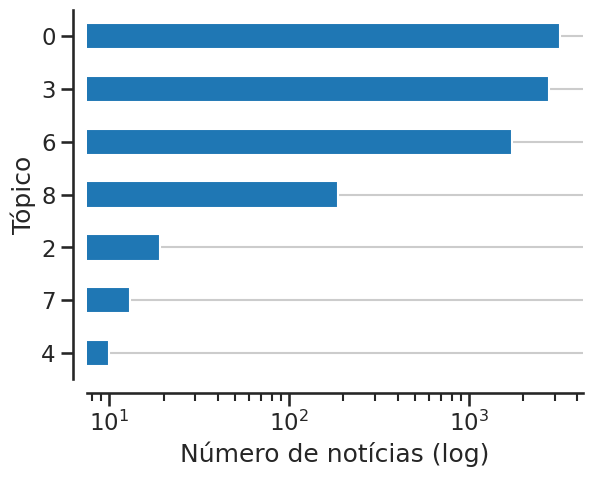

In [26]:
with sns.axes_style("ticks"):
    sns.set_context("talk")
    ax = news_2016['topic'].value_counts().sort_values().plot(kind = 'barh')
    ax.yaxis.grid(True)
    ax.set_ylabel("Tópico")
    ax.set_xlabel("Número de notícias (log)")
    sns.despine(offset = 10)
    ax.set_xscale("log")

## Crie uma nuvem de palavra para cada tópico.

Use as colunas `spacy_lemma` e  `topic` para essa tarefa.

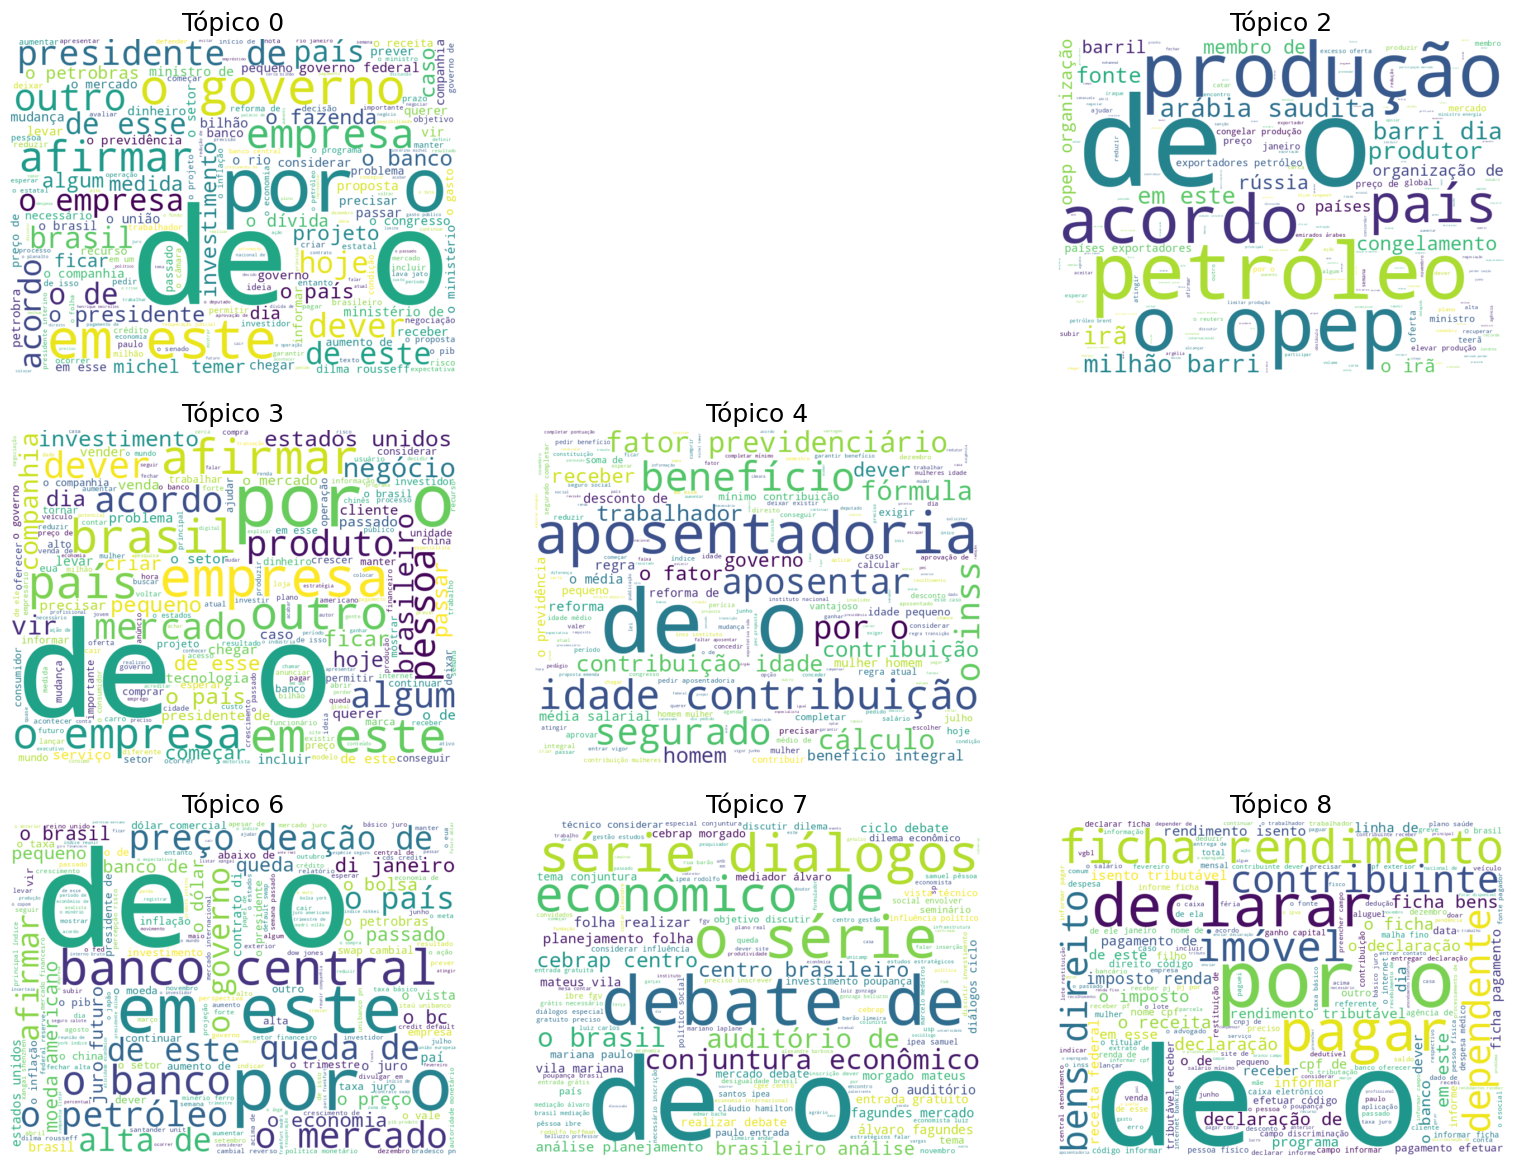

In [34]:
def plot_wordcloud(text:str, ax:plt.Axes) -> plt.Axes:
    """
    Plot the wordcloud for the text/
    Arguments:
        -  text: string to be analised
        -  ax: plt subaxis
    Returns:
     - ax
    """
    wordcloud = WordCloud(width=800, height=600, background_color='white').generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    return ax

def plot_wordcloud_for_a_topic(topic:int, ax:plt.Axes) -> plt.Axes:
    topic_news = news_2016[news_2016['topic'] == topic]
    list_of_words = chain(*topic_news.spacy_lemma.values.tolist())
    string_complete = ' '.join(list_of_words)
    if not string_complete:
        return None
    return plot_wordcloud(string_complete, ax)

fig, axis = plt.subplots(3, 3, figsize=(16, 12))

axis_  = axis.flatten()
for idx, ax in enumerate(axis_):
    ax_ = plot_wordcloud_for_a_topic(idx, ax)
    if ax_ is None:
        plt.delaxes(ax)
        continue
    ax.set_title(f"Tópico {idx}")
fig.tight_layout()

## Crie uma nuvem de entidades para cada tópico.

Use as colunas `spacy_lemma` e  `topic` para essa tarefa.

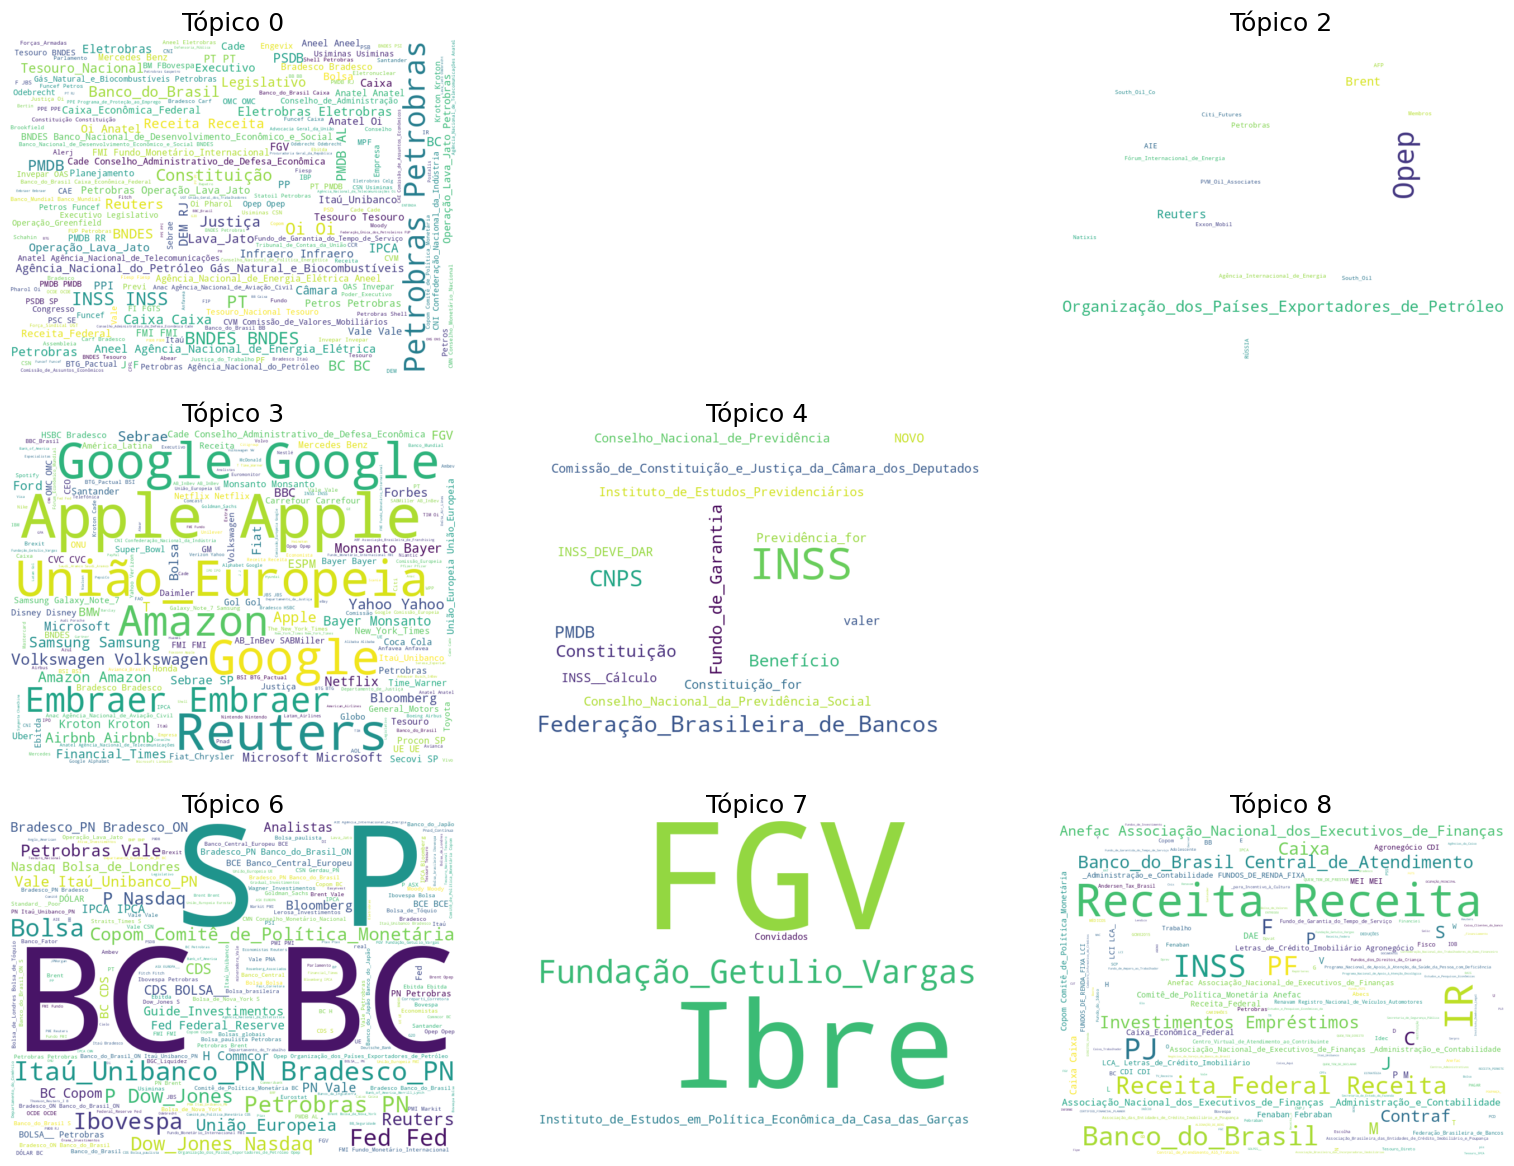

In [37]:
def plot_wordcloud_entities_for_a_topic(topic:int, ax:plt.Axes) -> plt.Axes:
    topic_news = news_2016[news_2016['topic'] == topic]
    list_of_docs = topic_news.spacy_ner.apply(lambda l : [w.replace(" ", "_") for w in l])
    list_of_words = chain(*list_of_docs)
    string_complete = ' '.join(list_of_words)
    if not len(string_complete):
        return None
    return plot_wordcloud(string_complete, ax)

fig, axis = plt.subplots(3, 3, figsize=(16, 12))

axis_  = axis.flatten()
for idx, ax in enumerate(axis_):
    ax_ = plot_wordcloud_entities_for_a_topic(idx, ax)
    if ax_ is None:
        plt.delaxes(ax)
        continue
    ax.set_title(f"Tópico {idx}")
fig.tight_layout()